#  Présentation Complète d'un Projet de Machine Learning

Nous suivrons étape par étape le flux de travail général de machine learning  
1. Nettoyage et formatage des données  
2. L'analyse exploratoire des données  
3. Ingénierie et sélection des fonctionnalités  
4. Comparez plusieurs modèles de Machines learning sur une métrique de performance.  
5. Effectuer le réglage des hyperparamètres sur le meilleur modèle.  
6. Evaluer le meilleur modèle sur l'ensemble de test  
7. Interpréter les résultats du modèle  
8. Tirer des conclusions et documenter le travail

### Définistion du problème  
La première étape avant d'obtenir le codage est de comprendre le problème que nous essayons de résoudre et les données disponibles. Dans ce projet, nous travaillerons avec les *données énergétiques des bâtiments acceessibles au public* de New York

**L'objectif est d'utiliser les données énergétiques pour construire un modèle capable de prédire le score Energy Star d'un bâtiment et d'interpréter les résultats pour trouver les facteurs qui influencent le score.**  
  
Les données incluent le score Energy Star, ce qui en fait une tâche de régression supervisée du machine learning:  
***

* **Supervisé**: nous avons accès à la fois aux fonctionnalités et à la cible et notre objectif est de former un modèle capable d'apprendre une cartographie entre les deux.  
  
* **Régression**: Le score Energy Star est une variable continue.  
  
***  

Nous voulons développer un modèle à la fois **précis** - il peut prédire le score Energy Star proche de la valeur réelle - et **interprétable** - nous pouvons comprendre les prédictions du modèle. Une fois que nous connaissons l'objectif, nous pouvons l'utiliser pour guider nos décisions lorsque nous explorons les données et construisons des modèles.

### Nettoyage des données  
Les données du monde réel sont désordonnées, ce qui signifie que nous devons les nettoyer et les classer dans un format acceptable avant même de pouvoir commencer l'analyse. Le nettoyage des données est une partie peu glamour, mais nécessaire de la plupart des problèmes réels de datamining.  
  
 
* Tout d'abord, nous pouvons charger les données en tant que Pandas *DataFrame* et jeter un oeil. 

In [58]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [59]:
import pandas as pd 
import numpy as np

# Read in data into a dataframe
data = pd.read_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/donne1.csv', sep=';',header=0, encoding= 'unicode_escape')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Unnamed: 54
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963.0,2,100,Whole Building,Not Available,Not Available,"305,6","303,1","37,8",Not Available,"614,2",Not Available,Not Available,Not Available,Not Available,Not Available,"51550675,1",Not Available,Not Available,"38139374,2","11082770,5","6962,2",0,"6962,2",762051,Not Available,Not Available,"619,4",5/1/17 5:32 PM,No,In Compliance,NaN
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969.0,12,100,Whole Building,Whole Building,55,"229,8","228,8","24,8","2,4","401,1",Not Available,"19624847,2",Not Available,Not Available,Not Available,"-391414802,6",933073441,"9330734,4",332365924,"96261312,1","55870,4","51016,4","4854,1",3889181,Not Available,Not Available,"404,3",4/27/17 11:23 AM,No,In Compliance,NaN
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924.0,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,4/27/17 11:23 AM,No,In Compliance,NaN
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971.0,1,100,Not Available,Not Available,Not Avail

In [18]:
with open('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/donne1.csv', 'rb') as f:
  text = f.read()


Il s'agit d'un sous-ensemble des données complètes qui contient 55 colonnes. Déjà, nous pouvons voir quelques problèmes: d'abord, nous savons que nous voulons prédire le **ENERGY STAR Score** mais nous ne savons pas ce que signifie l'une des colonnes. Bien que ce ne soit pas nécessairement un problème- nous pouvons souvent créer un modèle précis sans aucune connaissance des variables-nous voulons nous concentrer sur l'interprétabilité, et il peut être important de comprendre au moins certaines des colonnes.

Nous n'avons pas besoin d'étudier tous les colonnes, mais nous devrions au moins comprendre le score Energy Star, qui est décrit comme:  
Un classement de 1 à 100 centile basé sur la consommation d'énergie autodéclarée pour l'année de référence. Le score Energy Star est une mesure relative utilisée pour comparer l'efficacité énergétique des bâtiments.  
  
Cela résout notre premier problème, mais le deuxième est que les valeurs manquantes sont codées comme "Non disponible". Il s'agit d'une chaîne en Python, ce qui signifie que même les colonnes avec des nombres seront stockées en tant que `object` types de données car Pandas convertit une colonne avec toutes les chaînes en une colonne de toutes les chaînes. Nous pouvons voir les types de données des colonnes en utilisant la `dataframe.info()` méthode: 

In [60]:
# Voir les types de données de colonne et les valeurs non manquants

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11747 entries, 0 to 11746
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11747 non-null  object 
 1   Property Id                                                 11747 non-null  object 
 2   Property Name                                               11747 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11746 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Effectivement, certaines des colonnes qui contiennent clairement des nombres(comme $ft^{2}$) sont stockées comme des objets. Nous ne pouvons pas faire d'analyse numérique sur des chaînes, donc celles-ci devront être converties en `float`types de données numériques (spécifiquement)!  
  
Voici un petit code Python qui remplace toutes les entrées "Non disponible" par pas un nombre (`np.nan`), qui peut être interprété comme des nombres, puis convertit les colonnes pertinentes en `float`type de données:

In [74]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        #data[col] = data[col].astype(float)
        data[col] =pd.to_numeric(data[col], errors='coerce')
    

In [76]:
# Statistics for each column
data.describe()

,Order,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Unnamed: 54
count,11746.000000,1.171600e+04,3731.000000,1477.000000,11746.000000,9641.000000,1202.000000,1073.000000,1127.000000,2151.000000,1032.000000,1.0,1.059000e+03,3.270000e+02,3.790000e+02,10.000000,1.220000e+02,2.286000e+03,1.569000e+03,1.224000e+03,1.339000e+03,1.285000e+03,1.949000e+03,1.337000e+03,1.174500e+04,9.440000e+02,129.000000,1122.000000,0.0
mean,7185.759578,1.598974e+05,22567.085500,12016.813812,1948.580964,59.851053,828.435108,1095.653308,13.724046,4.629010,1254.711240,4782156.0,1.224069e+06,3.192904e+06,3.452314e+05,145162.200000,2.075354e+09,2.881315e+07,2.578136e+06,1.033024e+07,1.299453e+06,1.876879e+04,1.236215e+04,9.277558e+03,1.673812e+05,1.351193e+04,54.658915,299.424242,NaN
std,4323.859984,3.081804e+05,54569.998988,28021.143545,35.012767,29.993125,25078.172608,29003.844562,186.007423,202.557577,30995.834409,NaN,3.137447e+06,6.983931e+06,1.547367e+06,143092.824112,8.468871e+09,1.036268e+09,9.953893e+07,8.495784e+07,4.747701e+06,5.860636e+05,4.780804e+05,1.695160e+05,3.189364e+05,1.186421e+05,349.687975,3862.856600,NaN
min,1.000000,5.400000e+01,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4782156.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,3428.250000,6.520675e+04,4000.000000,1681.000000,1927.000000,37.000000,62.000000,64.000000,4.000000,0.000000,103.000000,4782156.0,0.000000e+00,0.000000e+00,0.000000e+00,17250.000000,3.114621e+06,2.702942e+05,4.471000e+03,9.795082e+05,2.411625e+05,2.980000e+02,0.000000e+00,7.600000e+01,6.699200e+04,2.009250e+03,0.000000,97.000000,NaN
50%,6986.500000,9.129750e+04,8633.000000,5000.000000,1941.000000,65.000000,78.000000,81.000000,5.000000,0.000000,131.500000,4782156.0,2.105880e+05,5.840000e+05,0.000000e+00,105639.000000,9.905586e+06,1.131230e+06,3.547200e+04,1.784940e+06,3.852960e+05,4.860000e+02,3.400000e+01,1.430000e+02,9.408000e+04,4.226500e+03,0.000000,126.000000,NaN
75%,11054.500000,1.530000e+05,20000.000000,11955.000000,1966.000000,85.000000,97.000000,101.000000,9.000000,0.000000,173.000000,4782156.0,8.280000e+05,4.321746e+06,0.000000e+00,251815.500000,5.176312e+07,4.720939e+06,6.540500e+04,4.340032e+06,9.393500e+05,8.770000e+02,3.010000e+02,3.740000e+02,1.584210e+05,7.908250e+03,47.000000,162.000000,NaN
max,14993.000000,1.421712e+07,962428.000000,591640.000000,2019.000000,100.000000,869265.000000,939329.000000,6202.000000,9393.000000,986366.000000,4782156.0,4.325762e+07,7.907464e+07,1.544347e+07,414000.000000,7.163518e+10,4.945919e+10,3.942852e+09,1.691763e+09,1.342978e+08,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,2.650864e+06,3978.000000,115108.000000,NaN


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11747 entries, 0 to 11746
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  float64
 1   Property Id                                                 11747 non-null  object 
 2   Property Name                                               11747 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11746 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11583 non-null  object 
 

Une fois que les colonnes correctes sont des nombres, nous pouvons commencer à étudier les données.

### Données manquantes et valeurs aberrantes  
En plus des types de données incorrects, les valeurs manquantes sont un autre problème courant lors du traitement de données réelles. Ceux-ci peuvent survenir pour de nombreuses raisons et doivent être soit remplis, soit supprimés avant de former un modèle d'apprentissage automatique.  
Tout d'abord, voyons le nombre de valeurs manquantes dans chaque colonne

La fonction suivante est une façon de calculer le nombre de valeur manquante et le pourcentage total des valeurs maquantes pour chaque colonne.

In [77]:
# fonction pour calculer les valeurs manquants par colonnes

def missing_values_table(df):
    # total missing values
        mis_val = df.isnull().sum()
        
        #percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [78]:
missing_values_table(data)

Your selected dataframe has 55 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 54,11747,100.0
Fuel Oil #1 Use (kBtu),11746,100.0
Diesel #2 Use (kBtu),11737,99.9
District Steam Use (kBtu),11625,99.0
Water Intensity (All Water Sources) (gal/ft²),11618,98.9
Address 2,11539,98.2
Fuel Oil #4 Use (kBtu),11420,97.2
Fuel Oil #5 & 6 Use (kBtu),11368,96.8
Water Use (All Water Sources) (kgal),10803,92.0
Weather Normalized Source EUI (kBtu/ft²),10715,91.2


Bien que nous souhaitons toujours faire attention à la suppression d'information, si une colonne a un pourcentage élevé de valeurs manquantes, cela ne sera probablement pas utile pour notre modèle. Le seuil de suppression des colonnes doit dépendre du problème, et pour ce projet, nous supprimerons toutes les colonnes avec plus de 50% de valeurs manquantes.  
  
À ce stade, nous souhaitons peut être également supprimer les valeurs aberrantes. Celles-ci peuvent être dues à des fautes de frappe dans la saisie des données, des erreurs dans les unités, ou elles peuvent être des valeurs légitimes mais extrêmes. Pour ce projet, nous seupprimerons les anomalies en fonction de la définition des valeurs aberrantes extrêmes:  
* Sous le premier quartile-intervalle interquartile de 3  
* Au dessu du troisème quartile + 3xinterquartile

In [79]:
# obtenir les colonnes avec > 50% de valeurs manquant

missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values']>50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 55 columns.
There are 53 columns that have missing values.
We will remove 27 columns.


In [80]:
# suppression des colonnes

data = data.drop(columns=list(missing_columns))

# For older versions of pandas (https://github.com/pandas-dev/pandas/issues/19078)
# data = data.drop(list(missing_columns), axis = 1)

Le reste des valeurs manquantes seront imputées en utilisant une stratégie de machine learning approprié

## L'analyse exploratoire des données

Maintenant que l'étape fastidieuse- mais nécessaire - du nettoyage des données est terminée, nous pouvont passer à l'exploration de nos données!  
**L'analyse exploratoire des données (EDA)** est un processus ouvert où nous calculons des statistiques et faisons des chiffres pour trouver des tendances, des anomalies, des modèles ou des relations dans les données.  
  
En bref, le but de EDA est d'apprendre ce que nos données peuvent nous dire. Cela commence généralement par une vue d'ensemble de haut niveau, puis se limite à des domaines spécifiques lorsque nous trouvons des parties intéressantes des données. Les résultats peuvent être intéressants en eux-même, ou ils peuvent être utilisés pour informer nos choix de modélisation, par exemple en nous aidant à décider des fonctionnalités à utiliser 

### Tracés à variable unique
L'objectif est de prédire le score Energy Star (renommé en `score`dans nos données). Un point de départ raisonnable consiste donc à examiner la distribution de cette variable. Un histogramme est un moyen simple mais efficace de visualiser la distribution d'une seule variable et est facile à utiliser `matplotlib`

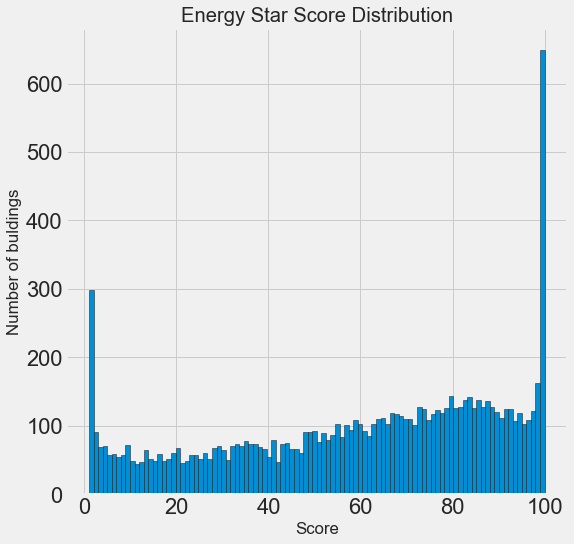

In [86]:
figsize(8,8)

# renommer le variable score
data = data.rename(columns={'ENERGY STAR Score': 'score'})
data = data.rename(columns={'Site EUI (kBtu/ft²)': 'Site_EUI'})




# Histogramme de Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of buldings')
plt.title('Energy Star Score Distribution')
plt.show()

Cela semble assez suspect! Le score Energy Star est un rang centile, ce qui signifie que nous nous attendons à voir une distribution uniforme, chaque score étant attribué au même nombre de bâtiments. Cependant, un nombre disproportionné de bâtiments ont soit le score le plus élevé, 100, soit le score le plus bas, 1 (le plus élevé est meilleur pour le score Energy Star).

Si nous revenons à la définition du score, nous voyons qu'il est basé sur une «consommation d'énergie auto-déclarée» qui pourrait expliquer les scores très élevés. Demander aux propriétaires d'immeubles de déclarer leur propre consommation d'énergie, c'est comme demander aux élèves de rapporter leurs propres scores à un test! Par conséquent, ce n'est probablement pas la mesure la plus objective de l'efficacité énergétique d'un bâtiment.

Si nous disposions d'un temps illimité, nous pourrions vouloir étudier pourquoi tant de bâtiments ont des scores très élevés et très faibles que nous pourrions en sélectionnant ces bâtiments et en voyant ce qu'ils ont en commun. Cependant, notre objectif est uniquement de prédire le score et non de concevoir une meilleure méthode de notation des bâtiments! Nous pouvons noter dans notre rapport que les scores ont une distribution suspecte, mais notre objectif principal est de prédire le score.

### Recherche de relations
Une partie importante de l'EDA est la recherche de relations entre les caractéristiques et la cible. Les variables corrélées à la cible sont utiles pour un modèle car elle peuvent être utilisées pour prédire la cible. Une façon d'examiner l'effet d'une variable catégorielle(qui ne prend qu'un ensemble limité de valeurs) sur la cible consiste à utiliser un graphique de densité à l'aide de la bibliothèque `seaborn`

Un *graphique de densité peut être considéré comme un histogramme lissé* car il montre la distribution d'une seul variable. Nous pouvons colorier un graphique de densité par classe pour voir comment une variable catégorielle modifie la distribution. Le code suivant crée un tracé de densité du score Energy Star coloré par le type de bâtiment(limité aux types de bâtiments avec plus de 100 points de données):

In [90]:
#data['Site_EUI'].describe()

Text(0.5, 1.0, 'Density plot of Energy Star Scores by Bulding Type')

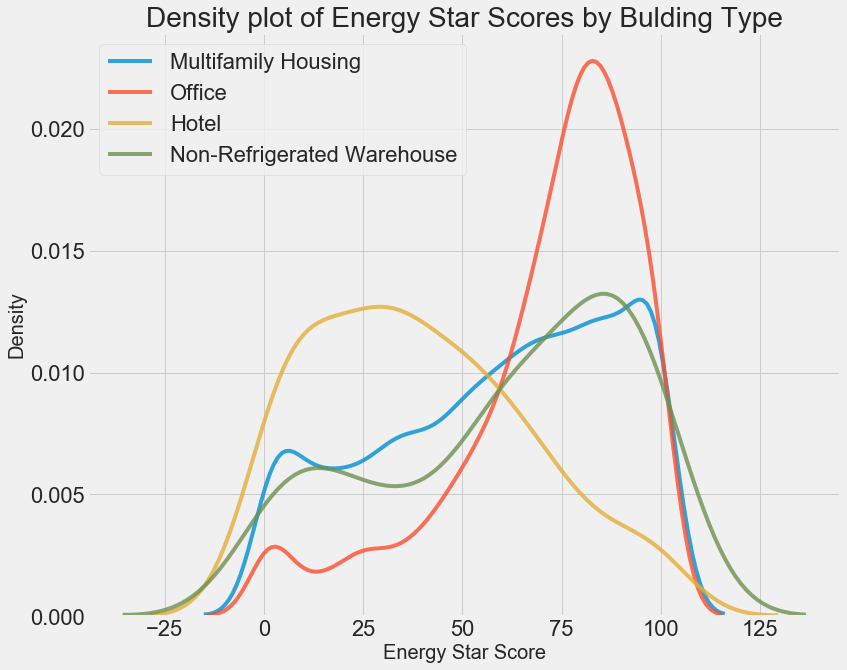

In [92]:
# Create a liste of bulding with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for bulding categories
figsize(12,10)

#plot each bulding
for b_type in types:
    # select the bulding type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade = False, alpha=0.8)

# label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density plot of Energy Star Scores by Bulding Type', size = 28)
    

On voit que le type de bâtiment a un impact significatif sur le score Energy Star. Les immeubles de bureaux ont tendance à avoir un score plus élevé tandis que les hôtels ont un score inférieur. Cela nous indique que nous devons inclure le type de bâtiment dans notre modèlisation car il a un impact sur le cible. En tant que variable catégorielle, nous devrons encoder à chaud le type de bâtiment.

Un graphique similaire peut être utilisé pour afficher le score Energy Star par arrondissement:

In [93]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

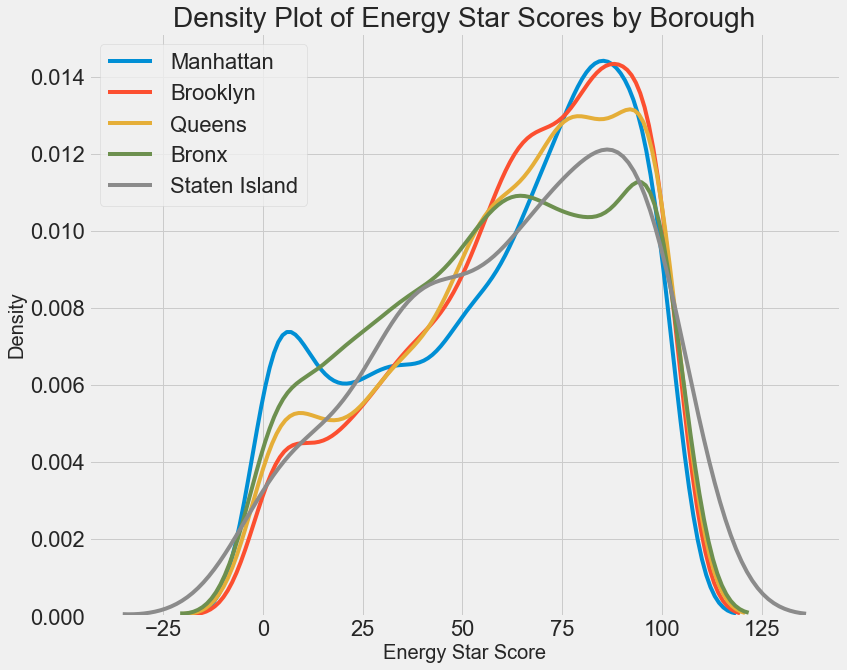

In [94]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough)
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20) 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

L'arrondissement ne semble pas avoir un impact aussi important sur le score que le type de bâtiment. Néanmoins, nous pourrions vouloir l'inclure dans notre modèle car il existe de légères différences entre les arrondissements

### Correlations between Features and Target

Pour quantifier les relations entre les variables, nous pouvons utiliser le coefficient de corrélation de Pearson . Il s'agit d'une mesure de la force et de la direction d'une relation linéaire entre deux variables. Un score de +1 est une relation positive parfaitement linéaire et un score de -1 est une relation linéaire parfaitement négative

Bien que le coefficient de corrélation ne puisse pas capturer les relations non linéaires, c'est un bon moyen de commencer à comprendre comment les variables sont liées. Dans Pandas, nous pouvons facilement calculer les corrélations entre toutes les colonnes d'un dataframe:

In [98]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))


Year Built                                           -0.118191
Largest Property Use Type - Gross Floor Area (ft²)    0.015821
Property GFA - Self-Reported (ft²)                    0.016834
Order                                                 0.039423
score                                                 1.000000
Name: score, dtype: float64 

Year Built                                           -0.118191
Largest Property Use Type - Gross Floor Area (ft²)    0.015821
Property GFA - Self-Reported (ft²)                    0.016834
Order                                                 0.039423
score                                                 1.000000
Name: score, dtype: float64


Il existe plusieurs corrélations négatives fortes entre les caractéristiques et la cible, les plus négatives étant ....

Pour tenir compte des relations non linéaires possibles, nous pouvons prendre des transformations de racine carrée et de log naturel des entités, puis calculer les coefficients de corrélation avec le score. Pour essayer de capturer toutes les relations possibles entre le type d'arrondissement ou de bâtiment (rappelez-vous qu'il s'agit de variables catégorielles) et le score, nous devrons encoder ces colonnes à chaud.

Dans le code suivant, nous prenons les transformations log et racine carrée des variables numériques, encodons à chaud les deux variables catégorielles sélectionnées (type de bâtiment et arrondissement), calculons les corrélations entre toutes les caractéristiques et le score, et affichons le top 15 les corrélations les plus positives et les 15 corrélations les plus négatives. C'est beaucoup, mais avec les pandas, il est simple de faire chaque 

In [100]:
## Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_'+ col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_'+ col] = np.log(numeric_subset[col])
        

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)


# Join the two dataframe using concat
# Make sure to use axis=1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis=1)

# Drop buldings without an energy star score
features = features.dropna(subset=['score'])

# find correlation with the score
correlations = features.corr()['score'].dropna().sort_values()

        

C:\Users\Sony\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [101]:
# Display most negative correlations
correlations.head(15)

Year Built                                                        -0.118191
sqrt_Year Built                                                   -0.117790
log_Year Built                                                    -0.117371
Largest Property Use Type_Hotel                                   -0.102540
Largest Property Use Type_Multifamily Housing                     -0.070457
Largest Property Use Type_Senior Care Community                   -0.058138
Borough_Bronx                                                     -0.033057
Borough_Manhattan                                                 -0.033014
Largest Property Use Type_Distribution Center                     -0.019892
Largest Property Use Type_Wholesale Club/Supercenter              -0.018410
Largest Property Use Type_Bank Branch                             -0.017219
Largest Property Use Type_Medical Office                          -0.013305
Largest Property Use Type_K-12 School                             -0.009013
Largest Prop

In [102]:
# Display most positive correlations
correlations.tail(15)

Largest Property Use Type_Courthouse                       0.016401
Property GFA - Self-Reported (ft²)                         0.016834
log_Order                                                  0.018655
sqrt_Property GFA - Self-Reported (ft²)                    0.018839
sqrt_Largest Property Use Type - Gross Floor Area (ft²)    0.019967
Largest Property Use Type_Supermarket/Grocery Store        0.021354
log_Property GFA - Self-Reported (ft²)                     0.024781
Borough_Queens                                             0.027203
log_Largest Property Use Type - Gross Floor Area (ft²)     0.028502
sqrt_Order                                                 0.034011
Largest Property Use Type_Residence Hall/Dormitory         0.035154
Order                                                      0.039423
Borough_Brooklyn                                           0.052727
Largest Property Use Type_Office                           0.143391
score                                           

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

### Graphiques à deux variables
Pour visualiser les relations entre deux variables continues, nous utilisons des nuages de points. Nous pouvons inclure des informations supplémentaires, comme une variable catégorielle, dans la couleur des points. Par exemple, le graphique suivant montre le score Energy Star par rapport à l'EUI du site en fonction du type de bâtiment:

In [121]:
figsize(12, 10)

# Extract the building types
#features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
#features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
#sns.lmplot('Site EUI (kBtu/ft²)', 'score', hue = 'Largest Property Use Type', data = features, scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False, size = 12, aspect = 1.2)

# Plot labeling
#plt.xlabel("Site EUI", size = 28)
#plt.ylabel('Energy Star Score', size = 28)
#plt.title('Energy Star Score vs Site EUI', size = 36)

In [112]:
features.head()

,Order,Largest Property Use Type - Gross Floor Area (ft²),Year Built,score,Property GFA - Self-Reported (ft²),sqrt_Order,log_Order,sqrt_Largest Property Use Type - Gross Floor Area (ft²),log_Largest Property Use Type - Gross Floor Area (ft²),sqrt_Year Built,log_Year Built,sqrt_Property GFA - Self-Reported (ft²),log_Property GFA - Self-Reported (ft²),Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Multifamily Housing,Borough_Queens,Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Ambulatory Surgical Center,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Data Center,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,...,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Other - Technology/Science,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type
12,15.0,412503.0,1903.0,93.0,432503.0,3.872983,2.708050,642.263964,12.929999,43.623388,7.551187,657.649603,12.977345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Multifamily Housing
13,16.0,162656.0,1903.0,1.0,172656.0,4.000000,2.772589,403.306335,11.999393,43.623388,7.551187,415.518953,12.059056,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Multifamily Housing
18,21.0,321464.0,1939.0,72.0,321464.0,4.582576,3.044522,566.977954,12.680641,44.034078,7.569928,566.977954,12.680641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Multifamily Housing
19,22.0,204720.0,1939.0,67.0,204720.0,4.690416,3.091042,452.459943,12.229398,44.034078,7.569928,452.459943,12.229398,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Multifamily Housing
20,23.0,116744.0,1939.0,80.0,116744.0,4.795832,3.135494,341.678211,11.667739,44.034078,7.569928,341.678211,11.667739,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Multifamily Housing


C:\Users\Sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 1.02, 'Pairs Plot of Energy Data')

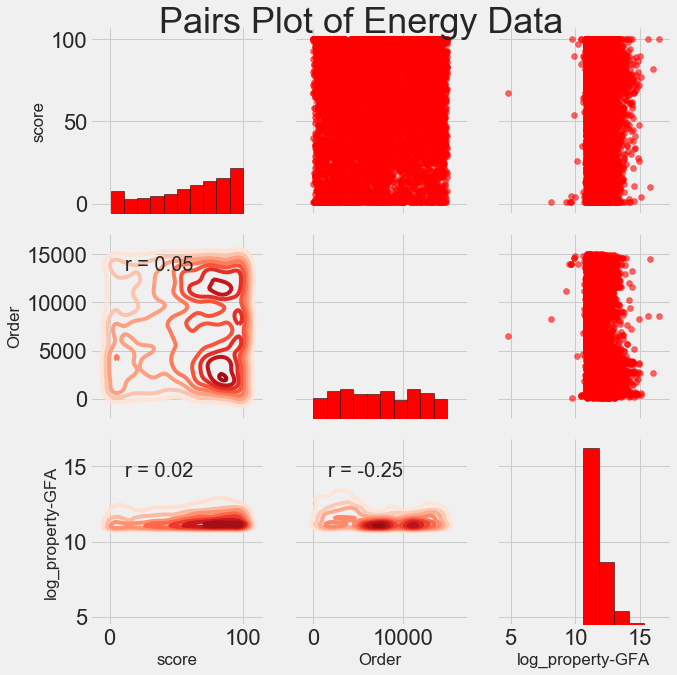

In [123]:
# Extract the columns to  plot
plot_data = features[['score', 'Order', 'log_Property GFA - Self-Reported (ft²)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'log_Property GFA - Self-Reported (ft²)': 'log_property-GFA'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)

Pour voir les informations entre les variables, nous recherchons le point d'intersection d'une ligne avec une colonne. Par exemple, pour voir la corrélation de `Òrder`avec `score`, nous regardons dans la ligne `order`et la colonne `score` et voyons un coefficient de corrélation de 0.039423. En plus d'avoir l'air sympa, des graphiques comme ceux-ci peuvent nous aider à décider quelles variables inclure dans la modélisation.

### Feature Engineering and Selection

*L'ingénierie et la sélection des fonctionnalités* offrent souvent le meilleur retour sur le temps investi dans un problème de machine learning. Tout d'abord, définissons ce que sont ces deux tâches:  
* *Ingénierie des features*: processus de prise de données brutes et d'extraction ou de création de nouvelles features. Cela peut impliquer de prendre des transformations de variables, telles qu'un logarithme naturel et une racine carrée, ou des variables catégorielles de codage à chaud afin qu'elles puissent être utilisées dans un modèle. En général, on considère l'ingénierie des features comme la création de fonctionnalités supplémentaires à partir des données brutes.  
* *Sélection des features*: processus de sélection des features les plus pertinentes dans les données. Dans la sélection des features, nous supprimons des features pour aider le modèle à mieux se généraliser aux nouvelles données et à créer un modèle plus interprétable. En général, on considère la sélection de features comme une soustraction de features, de sorte qu'il ne nous reste que celles qui sont les plus importantes.  
  
Un modèle de machine learning ne peut apprendre qu'à partir des données que nous lui fournissons, il est donc crucial de s'assurer que les données incluent toutes les informations pertinentes pour notre tâche. Si nous ne fournissons pas à un modèle les données correctes, nous le configurons pour échouer et nous ne devons pas nous attendre à ce qu'il apprenne!

Pour ce projet, nous allons suivre les étapes d'ingénierie des features suivantes:  
* Variables catégorielles de codage à chaud (type d'utilisation d'arrondissement et de propriété)  
* Ajouter la transformation logarithmique naturelle des variables numériques  
  
Le codage à chaud est nécessaire pour inclure des variables catégorielles dans un modèle. Un algorithme de machine learning ne peut pas comprendre un type de bâtiment de «bureau», nous devons donc l'enregistrer comme un 1 si le bâtiment est un bureau et un 0 dans le cas contraire.  
  
L'ajout d'entités transformées peut aider notre modèle à apprendre des relations non linéaires dans les données. Prendre la racine carrée, le logarithme naturel ou diverses puissances d'entités est une pratique courante en data science et peut être basé sur la connaissance du domaine ou sur ce qui fonctionne le mieux dans la pratique. Ici, nous inclurons le journal naturel de toutes les caractéristiques numériques.  
  
Le code suivant sélectionne les features numériques, prend les transformations de journal de ces features, sélectionne les deux features catégorielles, encode à chaud ces features et joint les deux ensembles. Cela semble demander beaucoup de travail, mais c'est relativement simple chez Pandas!

In [125]:
# copy the original data
features = data.copy()

# select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create column with Log of numeric columns
for col in numeric_subset.columns:
    # skip the Energy Star Score column
    if col == 'score' :
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        

# select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframe using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\Sony\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11747, 68)

Après ce processus, nous avons plus de 11 000 observations (bâtiments) avec 68 colonnes (caractéristiques). Toutes ces fonctionnalités ne seront probablement pas utiles pour prédire le score Energy Star, nous allons donc maintenant passer à la sélection de fonctionnalités pour supprimer certaines des variables.

#### Sélection de feature
Bon nombre des 68 feature que nous avons dans nos données sont redondantes car elles sont fortement corrélées les unes aux autres. Par exemple, voici un graphique de lEU du site par rapport à l'EUI du site normalisé par temps qui a un coefficient de corrélation de 

Text(0.5, 1.0, 'Propery_GFA vs Order, R = -0.1431')

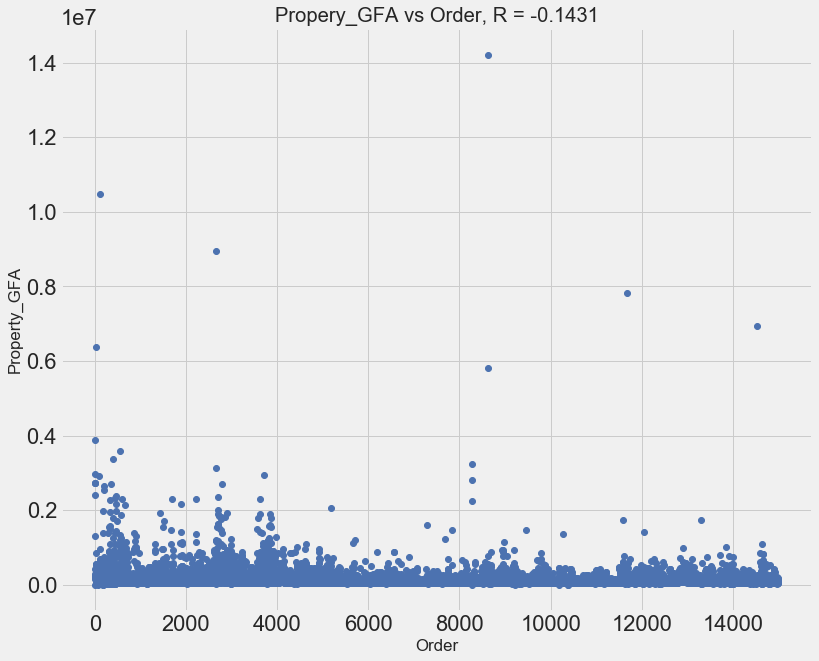

In [132]:
plot_data = data[['Largest Property Use Type - Gross Floor Area (ft²)', 'Order']].dropna()

plt.plot(plot_data['Order'], plot_data['Largest Property Use Type - Gross Floor Area (ft²)'], 'bo')
plt.xlabel('Order')
plt.ylabel('Property_GFA')
plt.title('Propery_GFA vs Order, R = %0.4f' % np.corrcoef(data[['Largest Property Use Type - Gross Floor Area (ft²)', 'Order']].dropna(), rowvar=False)[0][1])

Les features fortement corrélées les unes aux autres sont appelées colinéaires et la suppression de l'une des variables de ces paires de feature peut souvent aider un modèle de machine learning à se généraliser et à être plus interprétable . (Je dois souligner que nous parlons de corrélations de feature avec d'autres feature, et non de corrélations avec la cible(target), qui aident notre modèle!)  


Il existe un certain nombre de méthodes pour calculer la colinéarité entre les entités, l'une des plus courantes étant le facteur d'inflation de la variance . Dans ce projet, nous utiliserons le coefficient de corrélation pour identifier et supprimer les entités colinéaires. Nous supprimerons l'une des deux entités si le coefficient de corrélation entre elles est supérieur à 0,6. Pour l'implémentation.

In [133]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [135]:
# Remove the collinear features above a specified correlation coefficient
#features = remove_collinear_features(features, 0.6)

In [136]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape


(11747, 68)

### Ètablir une base de référence
Nous avons maintenant terminé le nettoyage des données, l'analyse exploratoire des données et l'ingénierie des features. La dernière étape à franchir avant de commencer la modélisation consiste à établire une *base de référence naïve*. Il s'agit essentiellement d'une supposition avec laquelle nous pouvons comparer nos résultats. Si les modèles de machine Learning ne dépassent pas cette hypothèse, nous devrons peut-être conclure que le modèle de machine learning n'est pas acceptable pour la tâche ou nous pourrions devoir essayer une approche différente.  
  
Pour les problèmes de régression, une ligne de base naïve raisonnable consiste à deviner la valeur médiane de la cible sur l'ensemble d'apprentissage pour tous les exemples de l'ensemble de test. Cela définit une barre relativement basse pour tout modèle à dépasser.  
  
La métrique que nous utiliserons est **l'erreur absolue moyenne (MAE)** qui mesure l'erreur absolue moyenne sur les prédictions. Il existe de nombreuses métriques pour la régression, mais on va choisir une seul métrique et de s'y tenir lors de l'évaluation des modèles. le MAE est facile à calculer et interprétable.  
  
Avant de calculer la ligne de base, nous devons diviser nos données en une formation et un ensemble de tests:  
1. **L'ensemble** de feature de formation est ce que nous fournissons à notre modèle pendant la formation avec les réponses. L'objectif est que le modèle apprenne un mappage entre les caractéristiques et la cible(target).  
2. **L'ensemble** de feature de test est utilisé pour évaluer le modèle entraîné. Le modèle n'est pas autorisé à voir les réponses pour l'ensemble de test et doit effectuer des prédictions en utilisant uniquement les features. Nous connaissons les réponses pour l'ensemble de test afin de pouvoir comparer les prédictions de test aux réponses.  
  
  
For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing).
  
Nous utiliserons 70% des données pour la formation et 30% pour les tests:

In [137]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)


(2106, 68)
(9641, 68)


In [139]:
# Separate out the features and targets
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for Later imputation)
features = features.replace({np.inf: np.nan, -np.inf:np.nan})

# Split into 70% training and 30% testing set
X,X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6748, 67)
(2893, 67)
(6748, 1)
(2893, 1)


We have 2106 buildings with no score, 6748 buildings with a score in the training set, and 2893 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat!

**Nous pouvons maintenant calculer les performances de base naïves:**

In [140]:
# Function to calculate MAE
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

**Now we can make the median guess and evaluate it on the test set.**

In [141]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)

print('Baseline Perfromance on the test set: MAE = %0.4f' % mae(y_test, baseline_guess))

The baseline guess is a score of 65.00
Baseline Perfromance on the test set: MAE = 25.4179


L'estimation naïve est décalée d'environ 25 points sur l'ensemble de test. Le score varie de 1 à 100, donc cela représente une erreur de 25%, une barre assez basse à dépasser!

***

*Conclusion*  
nous avons parcouru les trois premières étapes d'un problème de machine learning. Après avoir défini la question, nous avons:  

1. Nettoyé et formaté les données brutes  

2. Réalisation d'une analyse exploratoire des données pour en savoir plus sur l'ensemble de données  

3. Développer un ensemble de features que nous utiliserons pour nos modèles  
  
Enfin, nous avons également franchi l'étape cruciale consistant à établir une base de référence par rapport à laquelle nous pouvons juger nos algorithmes d'apprentissage automatique

As a final step here, we will save the datasets we developed to use again in the next part.

In [143]:
# Save the no scores, training, and testing data
no_score.to_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/no_score.csv', index = False)
X.to_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/training_features.csv', index = False)
X_test.to_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/testing_features.csv', index = False)
y.to_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/training_labels.csv', index = False)
y_test.to_csv('C:/Users/Sony/Desktop/Mes_Docs/DA_DS/testing_labels.csv', index = False)